<a href="https://colab.research.google.com/github/sangsin/Introduction-to-Deep-Learning-with-Tensorflow-2.0-and-Keras/blob/main/Linear_Regression_with_TF_2_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression with TensorFlow 2.0 APIs
This notebook demonstrates how to construct a linear regression model with the newer TensorFlow 2.+ APIs.

우선 필요한 packge를 import

- Tensorflow
- [Pandas](https://pandas.pydata.org/) 
- [NumPy](https://www.numpy.org/) 
-  [Scikit Learn's `train_test_split` module.](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [67]:
import tensorflow as tf 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

print('Tensorflow version: ', tf.__version__ )
print('\n')

# 그래피카드 유무 확인 및 메모리 확장 설정
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  print('사용가능한 GPU 갯수: ',len(gpus), '\n')
      
  try:
    # 프로그램이 실행되어 더 많은 GPU 메모리가 필요하면, 텐서플로 프로세스에 할당된 GPU 메모리 
    # 영역을 확장할 수있도록 허용
    tf.config.experimental.set_memory_growth(gpus[0], True)

  except RuntimeError as e:
    # 프로그램 시작시에 접근 가능한 장치가 설정되어야만 합니다
    print(e)

# 설치된 GPU 상세내용 확인
!nvidia-smi

Tensorflow version:  2.4.1


사용가능한 GPU 갯수:  1 

Sun May 16 23:09:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                        

## [How to fetch Kaggle datasets into Colab](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)

- Step 1:[Get you Kaggle API Token](https://www.kaggle.com/mohansacharya/graduate-admissions)
  - Go to Your Account and click on Create New API Token.
  - **A file named kaggle.json will get downloaded **containing your username and token key

- Step 2: Uploading kaggle.json into Google Drive
  - **Create a folder named kaggle** where we will be storing our Kaggle datasets
  - **Upload your kaggle.json** file into Kaggle folder

- Step 3: Open a Colab notebook
- Step 4: **Mount the drive to colab notebook**
      from google.colab import drive
      drive.mount('/content/gdrive')

- Step 4: Run the following code to provide the config path to kaggle.json
      import os
      os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/kaggle"
     
    Note: /content/gdrive/MyDrive/kaggle is the path where kaggle.json is present in the Google Drive

- Step 5: Change your present working directory
    
    %cd /content/gdrive/My Drive/kaggle

    !pwd

- Step 6: Download the kaggle dataset

  - Go to kaggle and copy the API Command to download the dataset

    Your API Command will look like “kaggle Adatasets download -d mohansacharya/graduate-admissions”

  - Run the following code using !.

    !kaggle datasets download -d datasnaek/youtube-new
  
  - You can check the content in your directory using ls command.

- Step 7: Unzip your data and remove the zip file
  - Use the unzip and rm command
     
    !unzip \*.zip  && rm *.zip

In [68]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [69]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/kaggle"

In [70]:
#changing the working directory
%cd /content/gdrive/MyDrive/kaggle
#Check the present working directory using pwd command
!pwd

/content/gdrive/MyDrive/kaggle
/content/gdrive/MyDrive/kaggle


### [Graduate Admission 2 Dataset](https://www.kaggle.com/mohansacharya/graduate-admissions)

- For predicting admission from important parameters
- The dataset contains several parameters which are considered important during the application for Masters Programs.
  - GRE Scores ( out of 340 )
  - TOEFL Scores ( out of 120 )
  - University Rating ( out of 5 )
  - Statement of Purpose (SOP, out of 5 )
  - Letter of Recommendation Strength (LOR out of 5 )
  - Undergraduate GPA (CGPA, out of 10 )
  - Research Experience ( either 0 or 1 )
  - Chance of Admit ( ranging from 0 to 1 )

In [71]:
!kaggle datasets download -d mohansacharya/graduate-admissions

  0% 0.00/9.64k [00:00<?, ?B/s]
100% 9.64k/9.64k [00:00<00:00, 2.72MB/s]


In [72]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  graduate-admissions.zip
replace Admission_Predict.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Admission_Predict.csv   
replace Admission_Predict_Ver1.1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Admission_Predict_Ver1.1.csv  


### (Easy way) Downloading the CSV file from Kaggle

- Download the data from [Graduate Admissions on Kaggle.com](https://www.kaggle.com/mohansacharya/graduate-admissions/download). 
- Unzip the downloaded file
- Upload to Colab or Google Drive


## [What is Pandas?](https://pandas.pydata.org/)

pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

**참고:** [Wikipedia - Pandas](https://en.wikipedia.org/wiki/Pandas_(software))

**참고:** [파이썬 데이터 분석의 절대지존 판다스의 아버지 웨스 매키니](https://m.post.naver.com/viewer/postView.nhn?volumeNo=28919607&memberNo=50533718&navigationType=push)

**참고 서적:** 📖[Python for Data Analysis by Wes McKinney, 2nd Ed.](http://library.lol/main/6558C6F3EFA0F99E1A4B40356EF854C6)



### Reading the CSV file with Pandas

We read the CSV file using [Pandas' `read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function and print the top 5 samples of the data.


In [73]:
data = pd.read_csv('/content/gdrive/MyDrive/kaggle/Admission_Predict_Ver1.1.csv' )
print('Sample size: ', data.count)
data.tail()

Sample size:  <bound method DataFrame.count of      Serial No.  GRE Score  TOEFL Score  ...  CGPA  Research  Chance of Admit 
0             1        337          118  ...  9.65         1              0.92
1             2        324          107  ...  8.87         1              0.76
2             3        316          104  ...  8.00         1              0.72
3             4        322          110  ...  8.67         1              0.80
4             5        314          103  ...  8.21         0              0.65
..          ...        ...          ...  ...   ...       ...               ...
495         496        332          108  ...  9.02         1              0.87
496         497        337          117  ...  9.87         1              0.96
497         498        330          120  ...  9.56         1              0.93
498         499        312          103  ...  8.43         0              0.73
499         500        327          113  ...  9.04         0              0.84

[500

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [74]:
# Select 'Serial No.' column and remove this from our dataset.
data.drop('Serial No.',axis=1,inplace=True)

data.columns


Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [75]:
data = data.rename(columns=lambda x: x.strip())

### How to get descriptive statistics using Pandas

In [76]:
print("Mean of GRE Score = ",data['GRE Score'].mean())
print("\nChance of Admit - Standard Deviation(표준편차) =",data['Chance of Admit'].std())
print("\nMean of CGPA = ",data.CGPA.mean())
print('\nMean of University Ranking = ', data.iloc[:,2].mean())
print('\nMean of First, second and fourth Column = \n', data.iloc[:,[0,1,3]].mean())
print("\nSTD of each columns\n",data.mean())

Mean of GRE Score =  316.472

Chance of Admit - Standard Deviation(표준편차) = 0.1411404039503023

Mean of CGPA =  8.576440000000003

Mean of University Ranking =  3.114

Mean of First, second and fourth Column = 
 GRE Score      316.472
TOEFL Score    107.192
SOP              3.374
dtype: float64

STD of each columns
 GRE Score            316.47200
TOEFL Score          107.19200
University Rating      3.11400
SOP                    3.37400
LOR                    3.48400
CGPA                   8.57644
Research               0.56000
Chance of Admit        0.72174
dtype: float64


In [77]:
## using this function we can simply find [count,mean,std,min,25%,50%,75%,max]
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [78]:
## Correlation
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


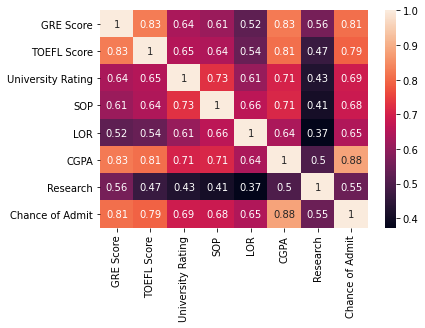

In [79]:
 import seaborn as sns
 sns.heatmap(data.corr(),annot=True)

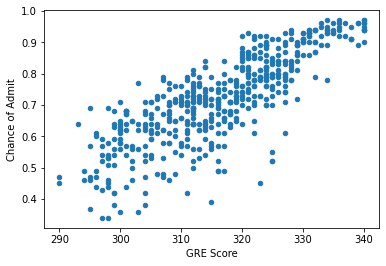

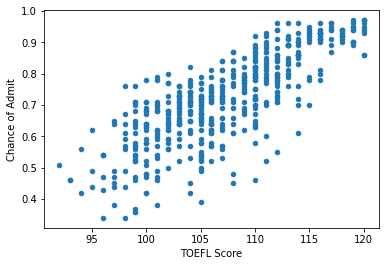

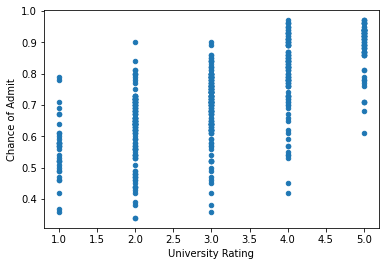

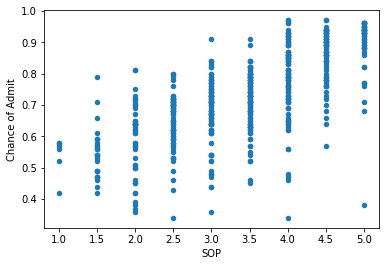

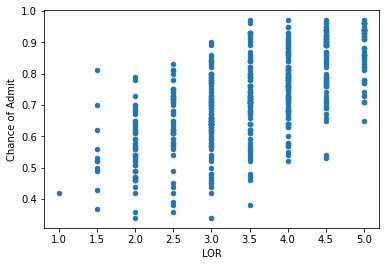

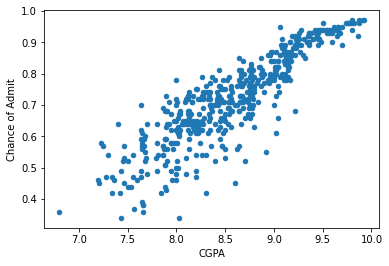

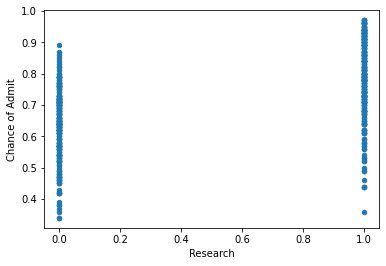

In [80]:
# Scatter Plot
for item in data.columns[0:7]:
  data.plot.scatter(x=item, y=data.columns[-1])

## Processing the CSV

We parse the values of the features from the Pandas `data` object. The steps are as follows:

1.   Read the values from the numeric/continuous features and normalize them by dividing with 100. ( `continuous_features` ) 
2.   Read the values from the binary feature. ( `categorical_research_feature` ) 
3.   Concatenate both the features types to form the final features array. ( `X` )
4.   Parse the label values. ( Y ) 
5.   Split the `X` and `Y` into training and validation datasets.
6.   Convert all the arrays to `tf.Tensor` objects.





In [81]:

# 숫자형 데이터 정규화
continuous_features = data[ ['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA'] ].values / 100 # ----( 1 )
# 범주형 데이터 분리 처리
categorical_research_features = data[ [ 'Research' ] ].values # ----( 2 )

# features data(독립변수) 병합 처리
X = np.concatenate( [ continuous_features , categorical_research_features ] , axis=1 ) # ----( 3 )
# axix = 0(down), 1(across) (아래그림 참조)

# 정답데이터(종속변수) 지정

Y = data[ [ 'Chance of Admit' ] ].values # ----( 4 )

# 학습 데이터와 테스트데이터 분리

train_features , test_features ,train_labels, test_labels = train_test_split( X , Y , test_size=0.2 ) # ----( 5 )

# tensor 생성

X = tf.constant( train_features , dtype=tf.float32 ) # -----|
Y = tf.constant( train_labels , dtype=tf.float32 ) # -------|
                                                           #|---( 6 )
test_X = tf.constant( test_features , dtype=tf.float32 ) #--|
test_Y = tf.constant( test_labels , dtype=tf.float32 ) # ---|


<img src = "https://i.stack.imgur.com/h1alT.jpg">

- axis = 0 (down)
- axis = 1 (across)

**참고:** [Axis and Dimensions in Numpy and Pandas Array](https://medium.com/analytics-vidhya/axes-and-dimensions-in-numpy-and-pandas-array-a2490f72631c)

<img src ="https://miro.medium.com/max/3600/0*fr4sfcnDc0KsXA8P.png">

## Linear Regression model

[__A Friendly Introduction to Machine Learning__](https://www.youtube.com/watch?v=IpGxLWOIZy4&t=507s)

[__Simple linear regression__](https://en.wikipedia.org/wiki/Simple_linear_regression)


### Mean Squared Error and its derivative

We define a method which calculates the [mean squared error](https://www.freecodecamp.org/news/machine-learning-mean-squared-error-regression-line-c7dde9a26b93/) given the predictions and the expected outcomes.

$\Large MSE( y , \hat{y} ) = \frac{ \sum_{i=0}^{N} ( y_i - \hat{y}_i )^2 } { N }$

And its derivative,

$\Large MSE'( y , \hat{y} ) = \frac{ 2 * \sum_{i=0}^{N} ( y_i - \hat{y}_i ) } { N }$



In [82]:
def mean_squared_error( Y , y_pred ):
    return tf.reduce_mean( tf.square( y_pred - Y ) )

def mean_squared_error_deriv( Y , y_pred ):
    return tf.reshape( tf.reduce_mean( 2 * ( y_pred - Y ) ) , [ 1 , 1 ] )

### Hypothesis function (  Regression function )

We define the hypothesis function *h* which takes in the weights and the bias and outputs the *Y* value for the given value of *X*.

$\Large h( x ) = W\cdot X + B$

where $W$ and $X$ are the parameters which are going to optimize by [Gradient Descent](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html).



### 📒 [신경세포(neuron)](https://pds.joins.com/news/component/joongang_sunday/201811/17/a0b23428-c888-43ae-a923-83d2c0055949.jpg)의 신호처리 방식과 유사

<img src="https://pds.joins.com/news/component/joongang_sunday/201811/17/a0b23428-c888-43ae-a923-83d2c0055949.jpg">

- 신경세포는 세포체(세포의 몸통)와 수상돌기, 축색, 그리고 시냅스 등으로 구성
- 세포체는 세포의 가장 기본적인 몸체이고 이 속에 세포핵이 들어 있다. 
- 수상돌기는 다른 신경세포의 시냅스로부터 신호를 받아들이는 역할
- 축색은 다른 신경세포에 신호를 전달해 주기 위한 통신선로
- 축색의 끝에 붙어 있는 시냅스는 다른 뇌세포에 신호를 주는 부분이다. 
- 수상돌기를 통하여 들어온 신호는 세포체로 전달된다. 많은 수상돌기에서 들어온 신호는 **세포체에서 하나로 종합**된다. 이것이 축색을 거치고 시냅스를 통하여 다른 세포에 전해진다. 

In [83]:
def h ( X , weights , bias ):
    return tf.tensordot( X , weights , axes=1 ) + bias

### Defining hyperparameters and `tf.data.Dataset`
We define two hyperparameters which will affect our training process.

*   Batch Size $\to$ The size of the mini-batch used in mini-batch gradient descent.
*   Learning Rate $\to$ The scalar value which scales the step size of the gradients.

Also, for effective mini-batch training, we create a [`tf.data.Dataset`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/data/Dataset) object which holds and batches our data tensors.





In [118]:
num_epochs = 10
num_samples = X.shape[0]
batch_size = 10
learning_rate = 0.001

dataset = tf.data.Dataset.from_tensor_slices(( X , Y )) 
dataset = dataset.shuffle( 500 ).repeat( num_epochs ).batch( batch_size )
iterator = dataset.__iter__()

### Training the model

We train the model for a given number of epochs. We perform optimization for every batch in our dataset.

Forward Propogation, to calculate the loss, is as follows,

$\Large loss = MSE( W.X + b ) $

To optimize the parameter $W$, the partial derivative of $MSE$ with respect to $W$ will be,


$\Large \frac{ \partial MSE }{ \partial W} = \frac{ \partial MSE }{ \partial h} \frac{ \partial h }{ \partial W}$

Similarly for bias $b$ , 

$\Large \frac{ \partial MSE }{ \partial b} = \frac{ \partial MSE }{ \partial h} $


In [119]:
num_features = X.shape[1]
weights = tf.random.normal( ( num_features , 1 ) ) 
bias = 0

epochs_plot = list()
loss_plot = list()

for i in range( num_epochs ) :
    
    epoch_loss = list()
    for b in range( int(num_samples/batch_size) ):
        x_batch , y_batch = iterator.get_next()
   
        output = h( x_batch , weights , bias ) 
        loss = epoch_loss.append( mean_squared_error( y_batch , output ).numpy() )
    
        dJ_dH = mean_squared_error_deriv( y_batch , output)
        dH_dW = x_batch
        dJ_dW = tf.reduce_mean( dJ_dH * dH_dW )
        dJ_dB = tf.reduce_mean( dJ_dH )
    
        weights -= ( learning_rate * dJ_dW )
        bias -= ( learning_rate * dJ_dB ) 
        
    loss = np.array( epoch_loss ).mean()
    epochs_plot.append( i + 1 )
    loss_plot.append( loss ) 
    
    print( 'Loss is {}'.format( loss ) ) 

Loss is 14.485467910766602
Loss is 6.979969024658203
Loss is 3.39189076423645
Loss is 1.6760482788085938
Loss is 0.8591658473014832
Loss is 0.4717753827571869
Loss is 0.2895731031894684
Loss is 0.20396475493907928
Loss is 0.16484037041664124
Loss is 0.14731641113758087


### Plotting the epoch-loss graph

We plot a simple graph which shows us the decrease in loss with increasing epochs.

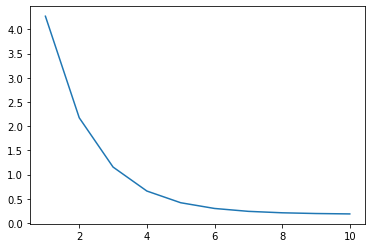

In [86]:
import matplotlib.pyplot as plt

plt.plot( epochs_plot , loss_plot ) 
plt.show()





## Evaluating the model

We evaluate our model's performance by measuring the [Mean Absolute Error](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html?highlight=mean%20absolute#mae-l1) on the validation dataset.

In [111]:
output = h( test_X , weights , bias ) 
labels = test_Y

accuracy_op = tf.metrics.MeanAbsoluteError() 
accuracy_op.update_state( labels , output )
print( 'Mean Absolute Error = {}'.format( accuracy_op.result().numpy() ) )

Mean Absolute Error = 25.698497772216797


In [88]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50